In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
path_to_spam = "../input/spam-text-message-classification/SPAM text message 20170820 - Data.csv"
df = pd.read_csv(path_to_spam)

In [3]:
#df.head(10)
#df.tail(10)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
#df["Category"].unique()
df.columns
Counter( df['Category'])

Counter({'ham': 4825, 'spam': 747})

In [5]:
ham = df[(df.Category == 'ham')]
spam = df[(df.Category == 'spam')]
ham[:2], spam[:2]

(  Category                                            Message
 0      ham  Go until jurong point, crazy.. Available only ...
 1      ham                      Ok lar... Joking wif u oni...,
   Category                                            Message
 2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
 5     spam  FreeMsg Hey there darling it's been 3 week's n...)

In [6]:
ham = ham['Message']
spam = spam['Message']
ham[:2], spam[:2]

(0    Go until jurong point, crazy.. Available only ...
 1                        Ok lar... Joking wif u oni...
 Name: Message, dtype: object,
 2    Free entry in 2 a wkly comp to win FA Cup fina...
 5    FreeMsg Hey there darling it's been 3 week's n...
 Name: Message, dtype: object)

In [7]:
hamtx = ""
spamtx = ""
for i in ham:
    hamtx += i + ' '
for i in spam:
    spamtx += i + ' '
hamtx[:120]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar..'

In [8]:
stop_words = stopwords.words("english")
stop_words.extend(['ok','u'])
def clean_text(text):
    text = text.lower()           # converting to lowercase
    text = re.sub("@\S+", " ", text)  
    text = re.sub("https*\S+", " ", text)      #\S - не пробел 
    text = re.sub("www\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)        # remove all numbers
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)     # remove punctuations
    text = re.sub('\n', ' ', text)        
    text = re.sub('\s{2,}',' ', text)        # remove extra spaces
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

In [9]:
hamtx = clean_text(hamtx)
spamtx = clean_text(spamtx)
hamtx[:120]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat lar joking wif oni dun say early hor '

In [10]:
hamline = word_tokenize(hamtx)
spamline = word_tokenize(spamtx) # => список слов
hamline[:9]

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world']

In [11]:
lemmatizer = WordNetLemmatizer()
lemham= [lemmatizer.lemmatize(t) for t in hamline]
lemspam = [lemmatizer.lemmatize(t) for t in spamline]
lemham[:9]

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world']

In [12]:
def visualize(l):
    text = ''
    for w in l:
        text += w + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="violet").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

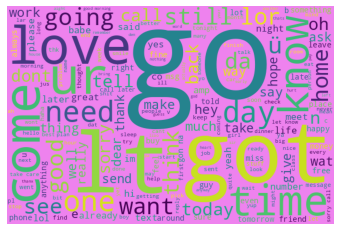

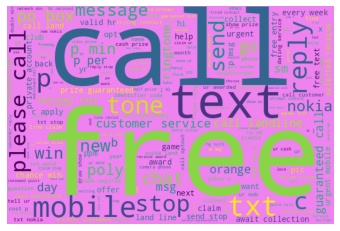

In [13]:
visualize(lemham)
visualize(lemspam)

In [14]:
def visualize_2(l): #биграмы
    text = ''
    for w in l:
        text += w + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="purple",collocation_threshold = 3).generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

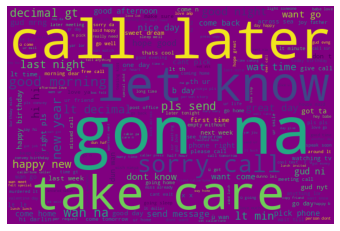

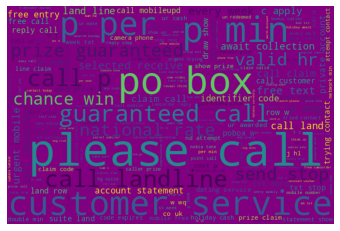

In [15]:
visualize_2(lemham)
visualize_2(lemspam)